<a href="https://colab.research.google.com/github/pawel0508/NeuralNetworks/blob/main/ModelKlasyfikacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision = 12, suppress = True, linewidth = 150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__


'2.3.0'

#### **Ładowanie danych**

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

print(f'x train shape: {x_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'x test shape: {x_test.shape}')
print(f'y test shape: {y_test.shape}')


4423680/4422102 [==============================] - 0s 0us/step
x train shape: (60000, 28, 28)
y train shape: (60000,)
x test shape: (10000, 28, 28)
y test shape: (10000,)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [5]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

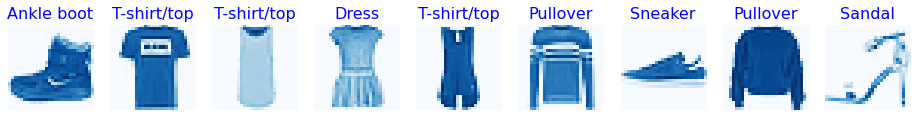

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(18, 13))
for i in range(1,10):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(x_train[i-1], cmap = 'Blues')
  plt.title(class_names[y_train[i-1]], color = 'blue', fontsize = 16)

In [12]:
x_train = x_train/255.
x_test = x_test/255.

### **Budowa modelu**

In [13]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, batch_size = 10, epochs = 10, validation_split = 0.2)

Epoch 1/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.4961 - accuracy: 0.8237 - val_loss: 0.3914 - val_accuracy: 0.8592
Epoch 2/10
4800/4800 [==============================] - 7s 2ms/step - loss: 0.3757 - accuracy: 0.8642 - val_loss: 0.3544 - val_accuracy: 0.8709
Epoch 3/10
4800/4800 [==============================] - 7s 2ms/step - loss: 0.3386 - accuracy: 0.8752 - val_loss: 0.3491 - val_accuracy: 0.8753
Epoch 4/10
4800/4800 [==============================] - 7s 2ms/step - loss: 0.3146 - accuracy: 0.8833 - val_loss: 0.3662 - val_accuracy: 0.8712
Epoch 5/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.2993 - accuracy: 0.8904 - val_loss: 0.3457 - val_accuracy: 0.8773
Epoch 6/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.2856 - accuracy: 0.8946 - val_loss: 0.3335 - val_accuracy: 0.8841
Epoch 7/10
4800/4800 [==============================] - 7s 1ms/step - loss: 0.2745 - accuracy: 0.8983 - val_loss: 0.3470 - val_accuracy:

In [17]:
metrics = pd.DataFrame(history.history)
metrics['epochs'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epochs
0,0.496079,0.823667,0.391377,0.859167,0
1,0.375676,0.864167,0.354359,0.870917,1
2,0.338636,0.875208,0.349121,0.875333,2
3,0.314624,0.883313,0.366245,0.871167,3
4,0.299281,0.890417,0.345733,0.877250,4
5,0.285590,0.894583,0.333539,0.884083,5
6,0.274484,0.898333,0.347034,0.876667,6
7,0.261799,0.902000,0.334789,0.883083,7
8,0.253616,0.906458,0.324836,0.885000,8
9,0.244875,0.908312,0.324201,0.887250,9


### **Ocena modelu**

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epochs'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epochs'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epochs'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epochs'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss', template = 'simple_white')
fig.show()

#### **model.evaluate()** pozwala obliczyć metryki modelu

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

In [22]:
print(test_acc)

0.8813999891281128


In [23]:
predictions = model.predict(x_test)

In [24]:
predictions

array([[0.000000038006, 0.000000000015, 0.000000000989, ..., 0.028803816   , 0.000000053675, 0.97112256    ],
       [0.000002183252, 0.            , 0.99965894    , ..., 0.            , 0.            , 0.            ],
       [0.000000006328, 1.            , 0.000000000002, ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000030083957, 0.            , 0.000015040838, ..., 0.            , 0.9999261     , 0.            ],
       [0.000000021312, 0.999838      , 0.000000000088, ..., 0.            , 0.000000000461, 0.000000000001],
       [0.000020595546, 0.00000000001 , 0.000000138264, ..., 0.00069263583 , 0.000006485103, 0.000017865159]], dtype=float32)

In [32]:
predictions_df = pd.DataFrame(predictions)

In [37]:
predictions_df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000074,0.000000,0.028804,0.000000,0.971123
1,0.000002,0.000000,0.999659,0.000000,0.000334,0.000000,0.000005,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.999997,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.273329,0.000000,0.002087,0.000787,0.000044,0.000000,0.723752,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000060,0.000000,0.999939
9996,0.000000,0.999961,0.000000,0.000039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9997,0.000030,0.000000,0.000015,0.000000,0.000026,0.000000,0.000003,0.000000,0.999926,0.000000
9998,0.000000,0.999838,0.000000,0.000162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
predictions_cls = model.predict_classes(x_test)

In [30]:
predictions_cls

array([9, 2, 1, ..., 8, 1, 5])

### **Eksploracja predykcji**

In [36]:
#@title Wybierz indeks zdjęcia:
idx = 6693 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v', 
                     marker_color=color))
fig.update_layout(width=800, title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (x_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

### **Błędnie sklasyfikowany obraz**

In [40]:
misclassified = []
for idx, _ in enumerate(x_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 815 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, 
                     y=predictions_df.iloc[index_mapper[idx]], 
                     orientation='v', 
                     marker_color='red'))

fig.update_layout(width=800,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (x_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)